In [161]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import chardet

In [163]:
with open('baskets.csv', 'rb') as f: # Бинарный режим
    result = chardet.detect(f.read())

result

{'encoding': 'windows-1251', 'confidence': 0.99, 'language': 'Russian'}

In [165]:
df = pd.read_csv('baskets.csv', header=None, encoding=result['encoding'])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,креветки,миндаль,авокадо,овощная смесь,зеленый виноград,цельнозерновая мука,батат,творог,энергетический напиток,томатный сок,низкокалорийный йогурт,зеленый чай,мед,салат,минеральная вода,лосось,ягодный сок,замороженный смузи,шпинат,оливковое масло
1,гамбургер,фрикадельки,яйца,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,чатни,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,индейка,авокадо,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,минеральная вода,молоко,энергетический батончик,рис,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,сливочное масло,низкокалорийный майонез,свежий хлеб,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,гамбургер,замороженные овощи,яйца,картофель-фри,журнал,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,курица,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,эскалоп,зеленый чай,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
df = df.dropna(how="all", axis=0)
df = df.dropna(how="all", axis=1)

transactions = df.apply(lambda row: row.dropna().tolist(), axis=1).tolist()
print(len(transactions))
print(transactions[:5])

7501
[['креветки', 'миндаль', 'авокадо', 'овощная смесь', 'зеленый виноград', 'цельнозерновая мука', 'батат', 'творог', 'энергетический напиток', 'томатный сок', 'низкокалорийный йогурт', 'зеленый чай', 'мед', 'салат', 'минеральная вода', 'лосось', 'ягодный сок', 'замороженный смузи', 'шпинат', 'оливковое масло'], ['гамбургер', 'фрикадельки', 'яйца'], ['чатни'], ['индейка', 'авокадо'], ['минеральная вода', 'молоко', 'энергетический батончик', 'рис', 'зеленый чай']]


In [169]:
te = TransactionEncoder() # Бинарная матрица
te_transformed = te.fit(transactions).transform(transactions) 
df_transformed = pd.DataFrame(te_transformed, columns=te.columns_) # te.columns_ - список уникальных товаров
df_transformed

,авокадо,аксессуары,баклажаны,батат,батончик без глютена,бекон,белое вино,белый сыр,блинчики,ветчина,...,чили,шампанское,шампунь,шоколад,шпинат,энергетический батончик,энергетический напиток,эскалоп,ягодный сок,яйца
0,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [171]:
support_thresholds = [0.01, 0.03, 0.05, 0.10, 0.15]
execution_times = []
results_df = pd.DataFrame()

for threshold in support_thresholds:

    start_time = time.time()
    
    frequent_itemsets = apriori(df_transformed, min_support=threshold, use_colnames=True)

    frequent_itemsets = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) == 1)]

    frequent_itemsets["support_threshold"] = threshold

    results_df = results_df._append(frequent_itemsets, ignore_index=True)

    end_time = time.time()

    execution_times.append(end_time - start_time)

results_df = results_df.sort_values(by=["support_threshold", "support"], ascending=[True, False])
results_df

,support,itemsets,support_threshold
31,0.238368,(минеральная вода),0.01
26,0.187975,(макароны),0.01
73,0.179709,(яйца),0.01
20,0.170911,(картофель-фри),0.01
69,0.163845,(шоколад),0.01
...,...,...,...
144,0.238368,(минеральная вода),0.15
143,0.187975,(макароны),0.15
146,0.179709,(яйца),0.15
142,0.170911,(картофель-фри),0.15


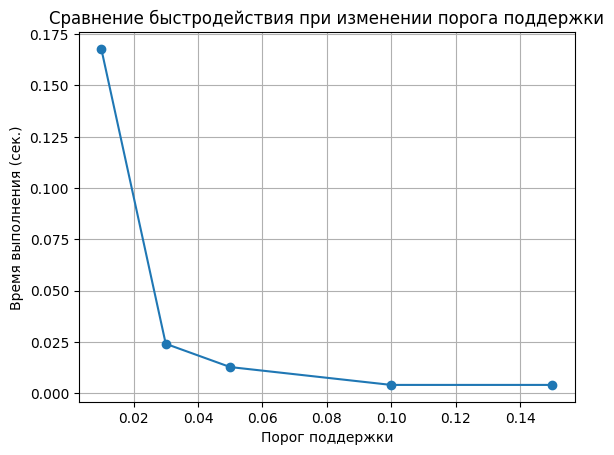

In [173]:
plt.plot(support_thresholds, execution_times, marker="o")
plt.title("Сравнение быстродействия при изменении порога поддержки")
plt.xlabel("Порог поддержки")
plt.ylabel("Время выполнения (сек.)")
plt.grid(True)
plt.show()

In [175]:
frequent_itemsets_2 = apriori(df_transformed, min_support=0.01, use_colnames=True, max_len=2)
frequent_itemsets_2 = frequent_itemsets_2.sort_values(by="support", ascending=False)
frequent_itemsets_2 = frequent_itemsets_2[frequent_itemsets_2["itemsets"].apply(lambda x: len(x) == 2)]
frequent_itemsets_2

,support,itemsets
183,0.061192,"(минеральная вода, макароны)"
211,0.052660,"(шоколад, минеральная вода)"
213,0.050927,"(минеральная вода, яйца)"
199,0.047994,"(молоко, минеральная вода)"
105,0.040928,"(минеральная вода, говяжий фарш)"
...,...,...
96,0.010265,"(гамбургер, рис)"
210,0.010265,"(хлопья, минеральная вода)"
124,0.010265,"(торт, замороженные овощи)"
120,0.010132,"(низкокалорийный йогурт, замороженные овощи)"


In [177]:
frequent_itemsets_3 = apriori(df_transformed, min_support=0.01, use_colnames=True, max_len=3)
frequent_itemsets_3 = frequent_itemsets_3.sort_values(by="support", ascending=False)
frequent_itemsets_3 = frequent_itemsets_3[frequent_itemsets_3["itemsets"].apply(lambda x: len(x) == 3)]
frequent_itemsets_3

,support,itemsets
245,0.017198,"(минеральная вода, говяжий фарш, макароны)"
254,0.016398,"(шоколад, минеральная вода, макароны)"
252,0.016131,"(молоко, минеральная вода, макароны)"
255,0.015198,"(минеральная вода, яйца, макароны)"
258,0.013998,"(шоколад, молоко, минеральная вода)"
260,0.013465,"(шоколад, минеральная вода, яйца)"
259,0.013065,"(молоко, минеральная вода, яйца)"
249,0.012265,"(минеральная вода, замороженные овощи, макароны)"
244,0.011732,"(минеральная вода, макароны, блинчики)"
256,0.011199,"(шоколад, молоко, макароны)"


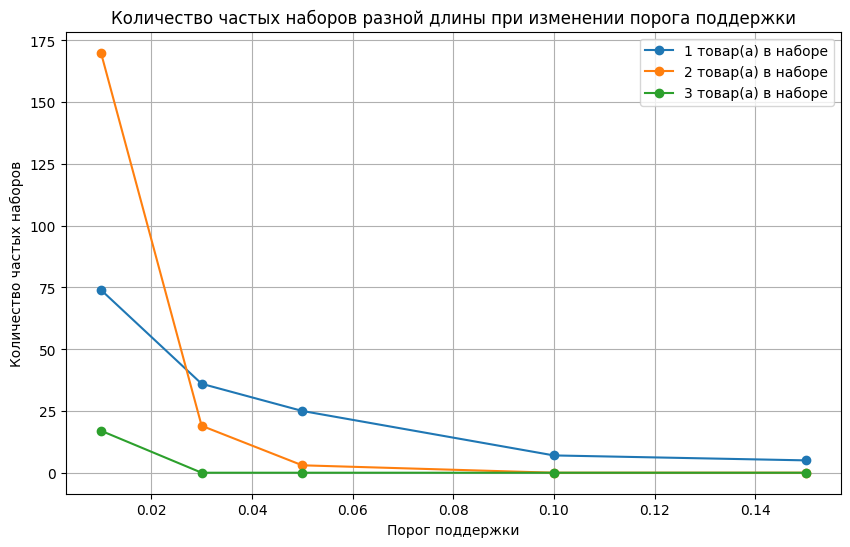

In [179]:
# Количество частых наборов объектов различной длины при изменяемом пороге поддержки
# Сколько частых наборов было найдено для каждого порога поддержки и для каждого размера наборов.
support_thresholds = [0.01, 0.03, 0.05, 0.10, 0.15]
execution_times = []
itemsets_sizes = {1: [], 2: [], 3: []}
results_df = pd.DataFrame()

for threshold in support_thresholds:
    start_time = time.time()

    frequent_itemsets = apriori(df_transformed, min_support=threshold, use_colnames=True)

    # Фильтрация частых наборов по длине набора
    frequent_itemsets_1 = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) == 1)].copy()
    frequent_itemsets_2 = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) == 2)].copy()
    frequent_itemsets_3 = frequent_itemsets[frequent_itemsets["itemsets"].apply(lambda x: len(x) == 3)].copy()

    itemsets_sizes[1].append(len(frequent_itemsets_1))
    itemsets_sizes[2].append(len(frequent_itemsets_2))
    itemsets_sizes[3].append(len(frequent_itemsets_3))

    frequent_itemsets_1["support_threshold"] = threshold
    frequent_itemsets_2["support_threshold"] = threshold
    frequent_itemsets_3["support_threshold"] = threshold

    # объединение частых наборов в один df
    results_df = results_df._append(frequent_itemsets_1, ignore_index=True)
    results_df = results_df._append(frequent_itemsets_2, ignore_index=True)
    results_df = results_df._append(frequent_itemsets_3, ignore_index=True)

    end_time = time.time()
    execution_times.append(end_time - start_time)

results_df = results_df.sort_values(by=["support_threshold", "support"], ascending=[True, False])

plt.figure(figsize=(10, 6))

for length in [1, 2, 3]:
    plt.plot(support_thresholds, itemsets_sizes[length], marker="o", label=f"{length} товар(а) в наборе")

plt.title("Количество частых наборов разной длины при изменении порога поддержки")
plt.xlabel("Порог поддержки")
plt.ylabel("Количество частых наборов")
plt.legend()
plt.grid(True)
plt.show()